#  Hierarchical Clustering of Distributions
In this notebook I will show how Hierarchical Clustering and the Kolmogorov–Smirnov statistic can be used to find clusters amongst a number of distributions.

## Imports and setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.cluster.hierarchy as sch
import seaborn as sns

from scipy.spatial.distance import pdist
from scipy.stats import ks_2samp

% matplotlib inline

sns.set_style("white")
sns.set_style("ticks")

plt.rcParams["font.family"] = "DejaVu Sans"

Ecolors = {'white'       : '#FFFFFF',
           'darkblue'    : '#00285F',
           'black'       : '#000000',
           'silver'      : '#B1B3B4',
           'purple'      : '#7B0663',
           'red'         : '#E32119',
           'orange'      : '#F08A00',
           'yellow'      : '#FABb00',
           'green'       : '#89BA17',
           'darkgreen'   : '#00625F',
           'paleblue'    : '#00A9D4'
          }

cMap = [Ecolors['red'], 
        Ecolors['orange'],
        Ecolors['yellow'],
        Ecolors['green'],
        Ecolors['darkgreen'],
        Ecolors['paleblue'],
        Ecolors['darkblue'],
        Ecolors['purple']
       ]

## Generating Data
Here we will voluntarilly create four distincts clusters of data. Each cluster is composed of a number (random selection between 10 and 50) normal distributions. Each of these normal distributions will be composed of a number of elements (random selection between 5 and 50) for which the characteristics (mean and standard deviation) will be centered around picked random values and each with its own bias.  
  
So in the end, we will have a number of normal random distributions of values of variable length, all having their own specific characteristics, but polirazing around four main clusters.

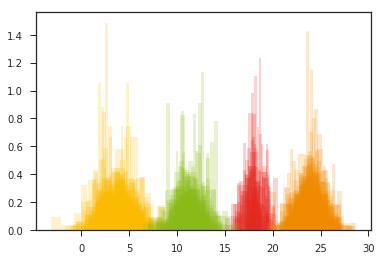

In [7]:
n_clusters = 4

plt.figure(1, figsize=(6,4))

distributions = [] # This will be our list of distributions
for c in range(n_clusters):
    n_distributions = np.random.randint(low=10, high=50)
    mean = np.random.random()*6*n_clusters
    std = np.random.random()*2
    for d in range(n_distributions):
        mean_bias = np.random.random()
        std_bias = np.random.random()*0.5
        distribution_length = np.random.randint(low=5, high=50)
        d = np.random.normal(loc=mean+mean_bias, scale=std+std_bias, size=distribution_length)
        distributions.append(d)
        
        # We plot each distribution colored according to its cluster
        plt.hist(d, color=cMap[c%len(cMap)], normed=True, alpha=0.2)
        
random.shuffle(distributions) # We shuffle the distribution for good measure, to make sure the order is not "helping" the clustering.

## Helper functions

### Calculation of the Kolmogorov–Smirnov statistic function
The Kolmogorov–Smirnov statistic will be used as a distance metric between each distributions.

In [4]:
def ksdist(X):
    d = np.zeros((len(X), len(X))) # We will leave the diagonal at minimum distance of 0
    for i in range(len(X)):
        for j in range(i+1, len(X)):
            if len(X[i])>0 and len(X[j])>0: # The KS statistic becomes the distance 0-> same distribution 1-> different distributions
                D, p = ks_2samp(X[i],X[j])
                d[i][j] = D
                d[j][i] = D
            else: # If we miss one or another distribution we set distance at max value of 1
                d[i][j] = 1.
                d[j][i] = 1.
    return d

### Calculation of the Hierarchical Clusters functions
Below functions allows to perform Hierarchical clustering of the previously computed Kolmogorov–Smirnov distance.

In [5]:
# Generate Hierarchical clusters in a distance matrix (d[n,n]) at a certain logical height (h)
# Returns the list of cluster labels[n]
def genHclusters(d, h):
    L = sch.linkage(d, method='ward')
    ind = sch.fcluster(L, 0.5*d.max(), 'distance')
    return sch.cut_tree(L, height=h).flatten()
    
# Get genHclusters()/orderdHClusters() with no more than max_clusters, so it increase depth until we have equal or less than max_clusters
def getClusters(dist, max_clusters=4):
    depth = 0
    cl = genHclusters(dist, depth)
    while len(np.unique(cl))>max_clusters:
        depth += 1
        cl = genHclusters(dist, depth)
    return cl

## Clustering
Now we will try to find back the distribution clusters we created while generating our data.

### Calculating the Kolmogorov–Smirnov distance
First we calculate the Kolmogorov–Smirnov distance and display a clustered heat-map (using Seaborn). We can visually see there is four main clusters

/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


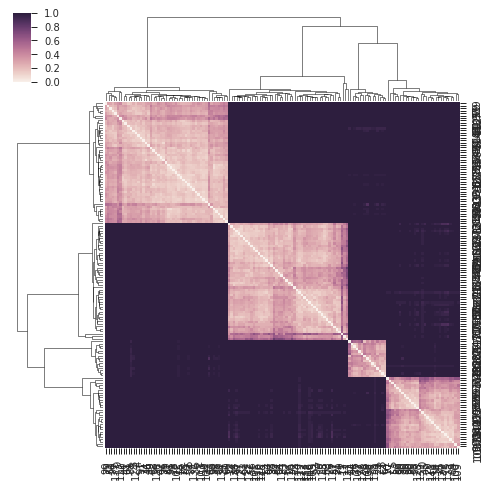

In [8]:
# calculating ks distances
distances = ksdist(distributions)

# Showing the clustered distance matrix
# Seaborn Clustermap use Hierarchical Clustering, so will will obtain comparable results.
sns.clustermap(distances, figsize=(8,8))

### Performing the Hierarchical Clustering
Knowing there is four clusters (from visualizing the seaborn clustered Kolmogorov-Smirnov distance matrix), we will retrieve those clusters.

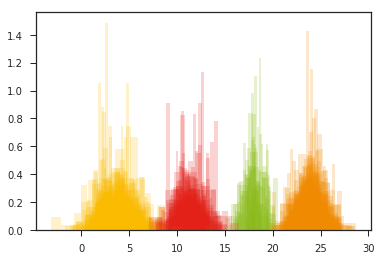

In [9]:
# ks clustering
profiles = getClusters(pdist(distances), max_clusters=4)

plt.figure(1, figsize=(6,4))

for d in range(len(distributions)):
    plt.hist(distributions[d], color=cMap[profiles[d]%len(cMap)], normed=True, alpha=0.2)

### What if?
What if we tried with 2 clusters?

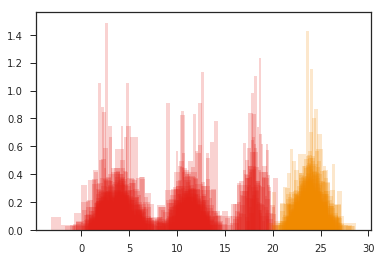

In [10]:
# ks clustering
profiles = getClusters(pdist(distances), max_clusters=2)

plt.figure(1, figsize=(6,4))

for d in range(len(distributions)):
    plt.hist(distributions[d], color=cMap[profiles[d]%len(cMap)], normed=True, alpha=0.2)

Or 6 clusters?

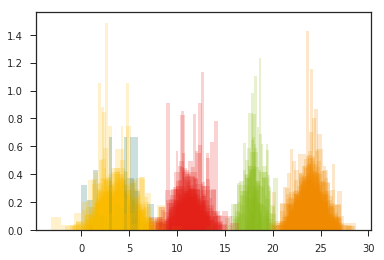

In [11]:
# ks clustering
profiles = getClusters(pdist(distances), max_clusters=6)

plt.figure(1, figsize=(6,4))

for d in range(len(distributions)):
    plt.hist(distributions[d], color=cMap[profiles[d]%len(cMap)], normed=True, alpha=0.2)